![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia original**: Luan Lima

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 2: Erros no algoritmo da bisseção

## Questão 1: Todos os pontos da bisseção

Neste teste vamos estudar a evolução do erro no eixo $y$ no decorrer do algoritmo da bisseção.
Para isso, vamos usar uma variação do método da bisseção que retorne
uma lista com todos os pontos percorridos pelo algoritmo até atingir o critério de parada.

Implemente a função `bissecao_pts`, utilizando como critérios de parada `xtol`, `ytol` e `maxiter`.

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    assert f(a)*f(b)<0, "O intervalo foi mal escolhido"
    niters = 0
    lista_aux = []
    meio = (a+b)/2
    while abs(b-a)>=xtol and abs(f(meio))>=ytol and niters <= maxiter:
        meio = (a+b)/2
        if f(a)*f(meio)<0:
            b = meio
            lista_aux.append(b)
        else:
            a = meio
            lista_aux.append(a)
        niters+=1
    return lista_aux

Alguns testes básicos para esta nova bisseção.

In [3]:
def p(a): 
    def f(x): return np.tan(x)-a
    return f

In [4]:
pts = bissecao_pts(p(1),0,np.pi/2, ytol=0)
assert abs(pts[-1]-np.pi/4) < 1e-8

In [5]:
for a in np.logspace(1,4):
    pts = bissecao_pts(p(a),0,np.pi/2, xtol=0)
    assert 1e-10 < abs(np.tan(pts[-1])-a) < 1e-8, (a, abs(np.tan(pts[-1])-a), len(pts))
    assert 1e-8 < abs(np.tan(pts[-2])-a)

In [6]:
for n in range(2,10):
    pts = bissecao_pts(p(n),0,np.pi/2, xtol=0)
    assert 25 < len(pts) < 35

## Questão 2: Aquecimento

Vamos começar estudando como se comporta o erro em $y$ para a função $f(x) = \sin(x)$. Faça um gráfico que contenha:
- no eixo horizontal, o número $n$ de iterações realizadas
- no eixo vertical, o erro em $y$ após a $n$-ésima iteração.

Utilize o intervalo padrão abaixo para todas as questões do teste.

In [7]:
a = -1+1e-12
b = 1/2

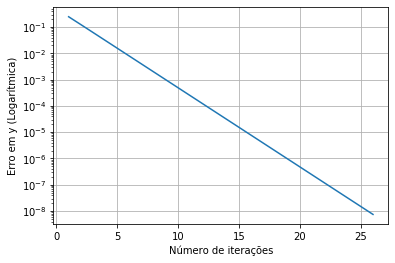

In [8]:
pts = np.array(bissecao_pts(np.sin, a, b))

plt.semilogy(np.arange(1,len(pts)+1), abs(np.sin(pts)))
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Logarítmica)");

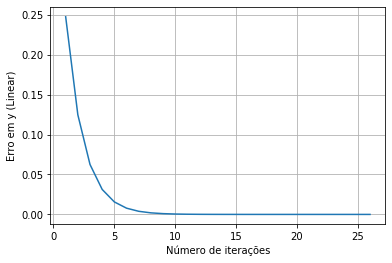

In [9]:
plt.plot(np.arange(1,len(pts)+1), abs(np.sin(pts)))
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Linear)");

Comente o gráfico. O que você observa sobre a velocidade de convergência do método?

De acordo com o segundo gráfico, podemos ver que a velocidade de convergência é elevada, pois o método da bisseção obtém convergência em aproximadamente 10 iterações. Com o primeiro gráfico, notamos que essa velocidade é, de certa forma, constante quando observamos o erro na escala logarítmica.

Agora represente, em um mesmo gráfico, a evolução do erro em $y$ para as funções $f(x) = \sin(x)$ e $g(x) = \sqrt[3]{x}$ (use `np.cbrt`).

Não se esqueça de botar título, legendas e labels nos eixos.

In [4]:
pts_cbrt = np.array(bissecao_pts(np.cbrt, a, b))
plt.plot(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(np.arange(1,len(pts)+1), abs(np.sin(pts)), color = "orange",  label ="$\sin{(x)}$" )
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Linear)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro linear nas ordenadas na bisseção de $\sqrt[3]{x}$ e $\sin{(x)}$ ", fontdict = {"fontsize":15});

NameError: name 'bissecao_pts' is not defined

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Compare a velocidade de convergência do método relativamente às duas funções. Como você explica essa diferença? Sinta-se à vontade para utilizar mais gráficos ou caixas de código para ajudar na sua explicação.

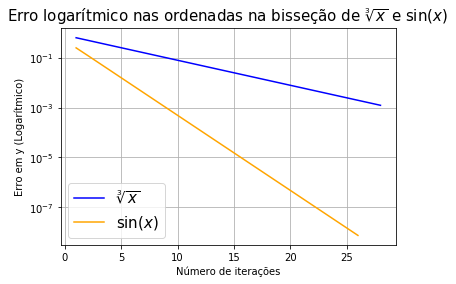

In [43]:
plt.semilogy(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.semilogy(np.arange(1,len(pts)+1), abs(np.sin(pts)), color ="orange", label ="$\sin{(x)}$" )
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Logarítmico)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro logarítmico nas ordenadas na bisseção de $\sqrt[3]{x}$ e $\sin{(x)}$ ", fontdict = {"fontsize":15});

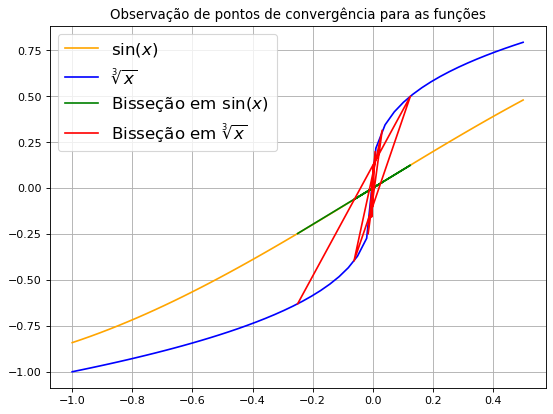

In [42]:
pontos = np.linspace(a,b)
pontos_sin = np.sin(pontos)
pontos_cbrt = np.cbrt(pontos)
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(pontos,pontos_sin,color = "orange", label ="$\sin{(x)}$")
plt.plot(pontos,pontos_cbrt, color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(pts, np.sin(pts),color = "green", label = "Bisseção em $\sin{(x)}$ ")
plt.plot(pts_cbrt, np.cbrt(pts_cbrt),color = "red", label = "Bisseção em $\sqrt[3]{x}$ ")
plt.grid()
plt.legend(prop = {"size":15});
plt.title("Observação de pontos de convergência para as funções");

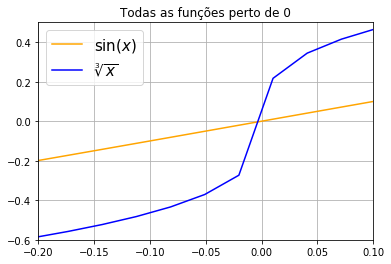

In [41]:
plt.plot(pontos,pontos_sin, color = "orange", label ="$\sin{(x)}$")
plt.plot(pontos,pontos_cbrt, color = "blue",  label = "$\sqrt[3]{x}$")
plt.grid()
plt.legend(prop = {"size":15})
plt.axis([-0.2,0.1,-0.6,0.5]);
plt.title("Todas as funções perto de 0");

No gráfico do erro em $y$ na escala logarítmica, é possível perceber com clareza que o erro em $f(x) = \sin(x)$ se aproxima de 0 bem mais rápido que em $g(x) = \sqrt[3]{x}$. Para fazer uma investigação do porquê disso, plotei um gráfico com ambas as funções e outras duas que mostravam onde os valores encontrados nas iterações ficavam. Neste gráfico, é possível perceber que os valores em $f(x)$ parecem convergir de maneira bem mais "confortável" que $g(x)$. Por fim, no último gráfico o motivo da diferença das velocidades de convergência ficou clara. Próximo da raiz, a função $f(x)$ se comporta como uma reta de pouca inclinação, variando pouco no eixo $y$ para uma variação em $x$; enquanto isso, o gráfico de $g(x)$ parece extremamente mais vertical perto da raiz 0. Isto significa que para um dado $\epsilon$ no eixo $x$, a variação de $f(x)$ é muito menor que de $g(x)$, o que faz com que as ordenadas dos valores encontrados pela bisseção em $f(x)$ estejam mais próximo de 0 do que as ordenadas dos valores encontrados em $g(x)$, o que explica a disparidade de aproximação entre $\sin(x)$ e $\sqrt[3]{x}$.

## Questão 3: Uma função diferentona

Agora vamos bolar uma função um pouco diferente para explorar os limites do método de bisseção. A função vai ser:

In [16]:
def h(x):
    return np.sign(x) / np.log(np.abs(x))

Faça um gráfico dessa função em uma vizinhança de 0.

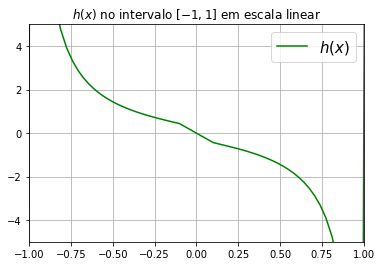

In [46]:
intervalo_neg = np.sort(-np.logspace(-1,1,100))
intervalo_pos = np.logspace(-1,1,100)
ptsh = np.concatenate((intervalo_neg, intervalo_pos))
list_aux = list(ptsh)
ax = plt.gca()
plt.plot(ptsh, h(ptsh), color="green", label = "$h(x)$")
plt.grid()
plt.legend(prop = {"size":15})
plt.title("$h(x)$ no intervalo $[-1,1]$ em escala linear");
plt.axis([-1,1,-5,5]);


In [18]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

Faça mais um gráfico, dessa vez comparando a evolução dos erros para as funções $f$, $g$ e $h$.

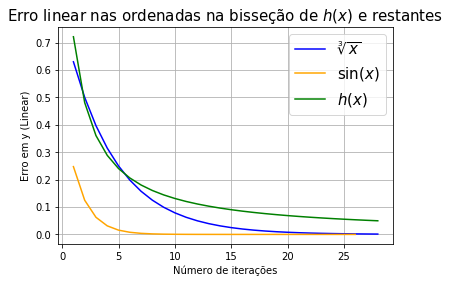

In [40]:
pts_h = np.array(bissecao_pts(h,a,b))
plt.plot(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(np.arange(1,len(pts)+1), abs(np.sin(pts)), color = "orange", label ="$\sin{(x)}$" )
plt.plot(np.arange(1,len(pts_h)+1), abs(h(pts_h)), color = "green", label = "$h(x)$")
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Linear)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro linear nas ordenadas na bisseção de $h(x)$ e restantes ", fontdict = {"fontsize":15});

In [20]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que aconteceu desta vez? Explique o porquê.

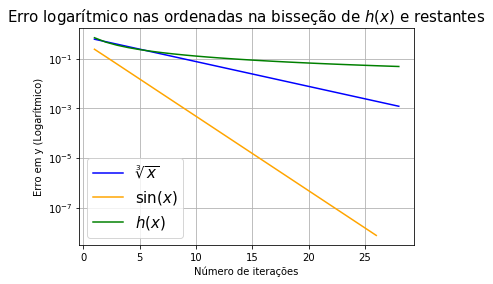

In [44]:
plt.semilogy(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.semilogy(np.arange(1,len(pts)+1), abs(np.sin(pts)), color = "orange",  label ="$\sin{(x)}$" )
plt.semilogy(np.arange(1,len(pts_h)+1), abs(h(pts_h)), color = "green",  label = "$h(x)$")
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Logarítmico)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro logarítmico nas ordenadas na bisseção de $h(x)$ e restantes ", fontdict = {"fontsize":15});

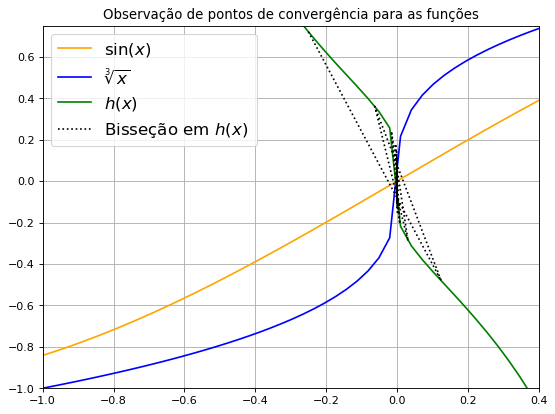

In [38]:
pontos_h = h(pontos)
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(pontos,pontos_sin, color = "orange", label ="$\sin{(x)}$")
plt.plot(pontos,pontos_cbrt, color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(pontos,pontos_h, color = "green", label =  "$h(x)$")
plt.plot(pts_h, h(pts_h), linestyle = ":", color = "black", label = "Bisseção em $h(x)$ ")
plt.grid()
plt.legend(prop = {"size":15})
plt.axis([-1,0.4,-1,0.75]);
plt.title("Observação de pontos de convergência para as funções");

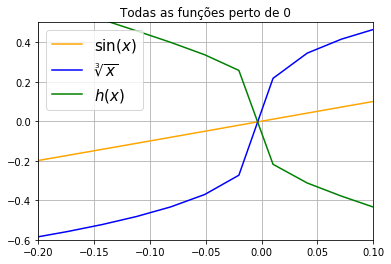

In [36]:
plt.plot(pontos,pontos_sin, color = "orange", label ="$\sin{(x)}$")
plt.plot(pontos,pontos_cbrt, color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(pontos,pontos_h, color = "green", label = "$h(x)$")
plt.grid()
plt.legend(prop = {"size":15})
plt.axis([-0.2,0.1,-0.6,0.5]);
plt.title("Todas as funções perto de 0");

Ánalogo à questão anterior, o gráfico logarítmico de $h(x)$ e $g(x) = \sqrt[3]{x}$ começam bem próximos, e como podemos ver, são bem parecidos no intervalo $[-0.2,0.1]$. Mas no final do gráfico logarítmico, $g(x)$ se aproxima de 0 mais rapidamente do que $h(x)$, o que faz sentido quando observamos $g(x)$ e $h(x)$ perto de 0, onde é possível notar uma variação ligeiramente maior em y em $h(x)$ do que em $g(x)$ quando damos um $\epsilon$ perto de 0.

## Questão 4: O outro lado da moeda

Para fechar com chave de ouro, vamos estudar a evolução do erro da função $h_2(x) = h^{-1}(x)$, isto é, a função $h_2$ tal que $h_2(h(x)) = x$ (digamos, em uma vizinhança de $x=0$). Implemente a função $h_2$ abaixo:

In [24]:
def h2(x):
    return np.sign(-x)*np.exp(np.sign(-x)*(1/x))

In [25]:
for x in np.linspace(-1+1e-8,1-1e-8,200):
    assert abs(h2(h(x))-x) < 1e-15, (x, x - h2(h(x)))
    assert abs(h(h2(x))-x) < 1e-15, (x, x - h(h2(x)))

Repita os estudos realizados anteriormente, com a inclusão de $h_2$.

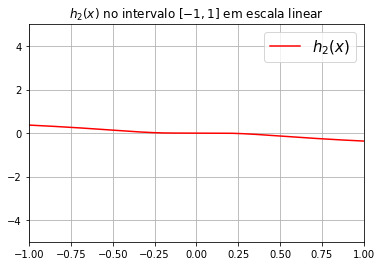

In [47]:
intervalo_neg = np.sort(-np.logspace(-1,1,400))
intervalo_pos = np.logspace(-1,1,400)
ptsh2 = np.concatenate((intervalo_neg, intervalo_pos))
list_aux = list(ptsh)
ax = plt.gca()
plt.plot(ptsh2, h2(ptsh2), color = "red", label = "$h_{2}(x)$")
plt.grid()
plt.legend(prop = {"size":15})
plt.title("$h_{2}(x)$ no intervalo $[-1,1]$ em escala linear");
plt.axis([-1,1,-5,5]);

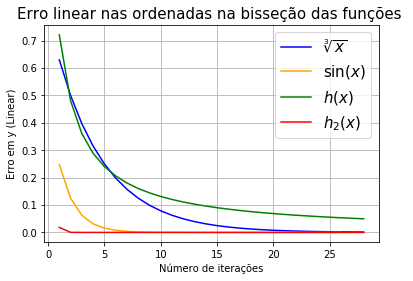

In [48]:
pts_h2 = np.array(bissecao_pts(h2,a,b, ytol= 0))
plt.plot(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(np.arange(1,len(pts)+1), abs(np.sin(pts)), color = "orange",  label ="$\sin{(x)}$" )
plt.plot(np.arange(1,len(pts_h)+1), abs(h(pts_h)), color = "green",  label = "$h(x)$")
plt.plot(np.arange(1,len(pts_h2)+1), abs(h2(pts_h2)), color = "red", label = "$h_{2}(x)$")
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Linear)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro linear nas ordenadas na bisseção das funções ", fontdict = {"fontsize":15});

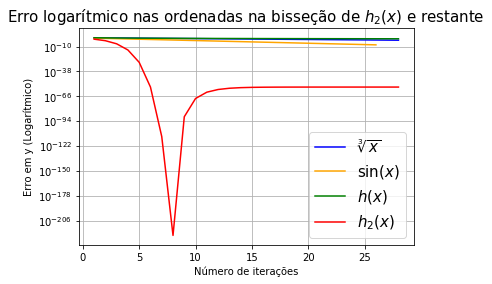

In [37]:
plt.semilogy(np.arange(1,len(pts_cbrt)+1), abs(np.cbrt(pts_cbrt)), color = "blue", label = "$\sqrt[3]{x}$")
plt.semilogy(np.arange(1,len(pts)+1), abs(np.sin(pts)), color = "orange", label ="$\sin{(x)}$" )
plt.semilogy(np.arange(1,len(pts_h)+1), abs(h(pts_h)), color = "green", label = "$h(x)$")
plt.semilogy(np.arange(1,len(pts_h2)+1), abs(h2(pts_h2)), color = "red", label = "$h_{2}(x)$")
plt.grid()
plt.xlabel("Número de iterações")
plt.ylabel("Erro em y (Logarítmico)")
ax = plt.gca()
plt.legend(prop = {"size":15})
plt.title("Erro logarítmico nas ordenadas na bisseção de $h_{2}(x)$ e restante ", fontdict = {"fontsize":15});

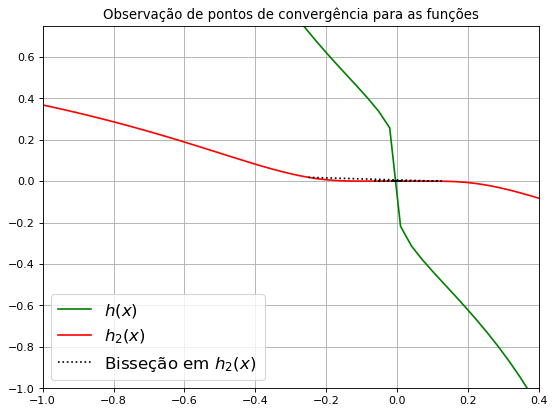

In [49]:
pontos_h2 = h2(pontos)
plt.figure(figsize = (8,6), dpi = 80)
plt.plot(pontos,pontos_h, color = "green", label =  "$h(x)$")
plt.plot(pontos,pontos_h2, color = "red", label =  "$h_{2}(x)$")
plt.plot(pts_h2, h2(pts_h2), linestyle = ":", color = "black", label = "Bisseção em $h_{2}(x)$ ")
plt.grid()
plt.legend(prop = {"size":15})
plt.axis([-1,0.4,-1,0.75]);
plt.title("Observação de pontos de convergência para as funções");

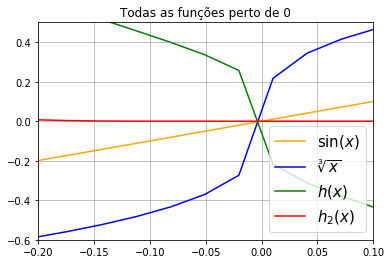

In [50]:
plt.plot(pontos,pontos_sin, color = "orange", label ="$\sin{(x)}$")
plt.plot(pontos,pontos_cbrt, color = "blue", label = "$\sqrt[3]{x}$")
plt.plot(pontos,pontos_h, color = "green", label = "$h(x)$")
plt.plot(pontos,pontos_h2, color = "red", label = "$h_{2}(x)$")
plt.grid()
plt.legend(prop = {"size":15})
plt.axis([-0.2,0.1,-0.6,0.5]);
plt.title("Todas as funções perto de 0");

Comente os resultados abaixo.

Como pôde se notar no gráfico de escala logarítmica, a função $h_{2}(x)$ tem convergência absurda perto das demais. Algo bem interessante de se notar é que o algorítmo da bisseção, por contar somente o sinal, "jogou fora" um intervalo em que tínhamos atingido uma possível raiz com erro absoluto menor que $10^{-200}$, o que torna o gráfico logarítmico de $h_{2}(x)$ bastante interessante. Por fim, o último gráfico tornou o argumento de que menores variações em $y$ significam convergência mais rápida irrefutável, pois é notável que o gráfico de $h_2{x}$ se assemelha ao próprio eixo $x$ de tamanha falta de variação.